<a href="https://colab.research.google.com/github/NanzibaBasnin/Regenerative_Fish_Firming/blob/main/Explainable_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving flux_data_07_21_22_metadata.xlsx to flux_data_07_21_22_metadata.xlsx


In [ ]:
import pandas as pd

# Read the Excel file
excel_file = 'flux_data_07_21_22_metadata.xlsx'
df = pd.read_excel(excel_file)

# Save the DataFrame as a CSV file
csv_file = 'flux_data_07_21_22_params.csv'
df.to_csv(csv_file, index=False)


In [ ]:
import pandas as pd

# Replace this with your dataset's file path
file_path = 'flux_data_07_21_22_params.csv'

# Read the CSV file into a Pandas DataFrame
dataset = pd.read_csv(file_path)

# Print the column names
for column in dataset.columns:
    print(column)


Run #
capex
linecost
labor
harvcost
transportcost
transportems
maintenanceboatems
insur
license
opex
sinkval
sequestration_rate
removal_rate
productval
avoidedems_product
convertcost
convertems
depth_mult
wave_mult
seaweed_map
prod_cost_low1p_avg
percentile_0.2_prodcost_avg
percentile_0.4_prodcost_avg
percentile_0.6_prodcost_avg
percentile_0.8_prodcost_avg
percentile_1_prodcost_avg
prod_cost_avg_northatlantic
prod_cost_avg_southatlantic
prod_cost_avg_northpacific
prod_cost_avg_centralpacific
prod_cost_avg_southpacific
prod_cost_avg_indian
net_costperton_sink_low1p_avg
percentile_0.2_sinkcost_avg
percentile_0.4_sinkcost_avg
percentile_0.6_sinkcost_avg
percentile_0.8_sinkcost_avg
percentile_1_sinkcost_avg
net_costperton_sink_avg_northatlantic
net_costperton_sink_avg_southatlantic
net_costperton_sink_avg_northpacific
net_costperton_sink_avg_centralpacific
net_costperton_sink_avg_southpacific
net_costperton_sink_avg_indian
net_costperton_product_low1p_avg
percentile_0.2_productcost_avg
per

In [ ]:
# Pandas is used for data manipulation
import pandas as pd

# Use numpy to convert to arrays
import numpy as np
import os
import lightgbm as lgbm
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_learning_curves

# Read in data and display first 5 rows
meta_file = os.path.expanduser('flux_data_07_21_22_params.csv')
features = pd.read_csv(meta_file)


In [ ]:
print(features.columns)


Index(['Run #', 'capex', 'linecost', 'labor', 'harvcost', 'transportcost',
       'transportems', 'maintenanceboatems', 'insur', 'license', 'opex',
       'sinkval', 'sequestration_rate', 'removal_rate', 'productval',
       'avoidedems_product', 'convertcost', 'convertems', 'depth_mult',
       'wave_mult', 'seaweed_map', 'prod_cost_low1p_avg',
       'percentile_0.2_prodcost_avg', 'percentile_0.4_prodcost_avg',
       'percentile_0.6_prodcost_avg', 'percentile_0.8_prodcost_avg',
       'percentile_1_prodcost_avg', 'prod_cost_avg_northatlantic',
       'prod_cost_avg_southatlantic', 'prod_cost_avg_northpacific',
       'prod_cost_avg_centralpacific', 'prod_cost_avg_southpacific',
       'prod_cost_avg_indian', 'net_costperton_sink_low1p_avg',
       'percentile_0.2_sinkcost_avg', 'percentile_0.4_sinkcost_avg',
       'percentile_0.6_sinkcost_avg', 'percentile_0.8_sinkcost_avg',
       'percentile_1_sinkcost_avg', 'net_costperton_sink_avg_northatlantic',
       'net_costperton_sink_avg

In [ ]:
# Labels are the values we want to predict
print(features.columns)
labels = np.array(features['percentile_0.2_prodcost_avg'])

growth = 0
sinking = 1
products = 0

features = features.drop('column_name', axis=1, errors='ignore')

# Remove the labels from the features
# axis 1 refers to the columns
if growth==1:
    features= features.drop('removal_rate', axis = 1)
    features= features.drop('avoidedems_product', axis = 1)
    features= features.drop('productval', axis = 1)
    features= features.drop('convertcost', axis = 1)
    features= features.drop('convertems', axis = 1)
    features= features.drop('sinkval', axis = 1)
    features= features.drop('sequestration_rate', axis = 1)

if sinking==1:
    features= features.drop('avoidedems_product', axis = 1)
    features= features.drop('productval', axis = 1)
    features= features.drop('convertcost', axis = 1)
    features= features.drop('convertems', axis = 1)

if products==1:
    features= features.drop('removal_rate', axis = 1)
    features= features.drop('sinkval', axis = 1)
    features= features.drop('sequestration_rate', axis = 1)

#features= features.drop('Unnamed: 0', axis = 1)
features= features.drop('net_costperton_product_low1p_avg', axis = 1)
features= features.drop('net_costperton_sink_low1p_avg', axis = 1)
features= features.drop('prod_cost_low1p_avg', axis = 1)
features= features.drop('percentile_0.2_prodcost_avg', axis = 1)
features= features.drop('percentile_0.4_prodcost_avg', axis = 1)
features= features.drop('percentile_0.6_prodcost_avg', axis = 1)
features= features.drop('percentile_0.8_prodcost_avg', axis = 1)
features= features.drop('percentile_1_prodcost_avg', axis = 1)
features= features.drop('prod_cost_avg_northatlantic', axis = 1)
features= features.drop('prod_cost_avg_southatlantic', axis = 1)
features= features.drop('prod_cost_avg_northpacific', axis = 1)
features= features.drop('prod_cost_avg_centralpacific', axis = 1)
features= features.drop('prod_cost_avg_southpacific', axis = 1)
features= features.drop('prod_cost_avg_indian', axis = 1)
features= features.drop('percentile_0.2_sinkcost_avg', axis = 1)
features= features.drop('percentile_0.4_sinkcost_avg', axis = 1)
features= features.drop('percentile_0.6_sinkcost_avg', axis = 1)
features= features.drop('percentile_0.8_sinkcost_avg', axis = 1)
features= features.drop('percentile_1_sinkcost_avg', axis = 1)
features= features.drop('net_costperton_sink_avg_northatlantic', axis = 1)
features= features.drop('net_costperton_sink_avg_southatlantic', axis = 1)
features= features.drop('net_costperton_sink_avg_northpacific', axis = 1)
features= features.drop('net_costperton_sink_avg_centralpacific', axis = 1)
features= features.drop('net_costperton_sink_avg_southpacific', axis = 1)
features= features.drop('net_costperton_sink_avg_indian', axis = 1)
features= features.drop('percentile_0.2_productcost_avg', axis = 1)
features= features.drop('percentile_0.4_productcost_avg', axis = 1)
features= features.drop('percentile_0.6_productcost_avg', axis = 1)
features= features.drop('percentile_0.8_productcost_avg', axis = 1)
features= features.drop('percentile_1_productcost_avg', axis = 1)
features= features.drop('net_costperton_product_avg_northatlantic', axis = 1)
features= features.drop('net_costperton_product_avg_southatlantic', axis = 1)
features= features.drop('net_costperton_product_avg_northpacific', axis = 1)
features= features.drop('net_costperton_product_avg_centralpacific', axis = 1)
features= features.drop('net_costperton_product_avg_southpacific', axis = 1)
features= features.drop('net_costperton_product_avg_indian', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

Index(['Run #', 'capex', 'linecost', 'labor', 'harvcost', 'transportcost',
       'transportems', 'maintenanceboatems', 'insur', 'license', 'opex',
       'sinkval', 'sequestration_rate', 'removal_rate', 'productval',
       'avoidedems_product', 'convertcost', 'convertems', 'depth_mult',
       'wave_mult', 'seaweed_map', 'prod_cost_low1p_avg',
       'percentile_0.2_prodcost_avg', 'percentile_0.4_prodcost_avg',
       'percentile_0.6_prodcost_avg', 'percentile_0.8_prodcost_avg',
       'percentile_1_prodcost_avg', 'prod_cost_avg_northatlantic',
       'prod_cost_avg_southatlantic', 'prod_cost_avg_northpacific',
       'prod_cost_avg_centralpacific', 'prod_cost_avg_southpacific',
       'prod_cost_avg_indian', 'net_costperton_sink_low1p_avg',
       'percentile_0.2_sinkcost_avg', 'percentile_0.4_sinkcost_avg',
       'percentile_0.6_sinkcost_avg', 'percentile_0.8_sinkcost_avg',
       'percentile_1_sinkcost_avg', 'net_costperton_sink_avg_northatlantic',
       'net_costperton_sink_avg

In [ ]:
print("Feature list:", feature_list)
#print("Features as numpy array:", features)


Feature list: ['Run #', 'capex', 'linecost', 'labor', 'harvcost', 'transportcost', 'transportems', 'maintenanceboatems', 'insur', 'license', 'opex', 'sinkval', 'sequestration_rate', 'removal_rate', 'depth_mult', 'wave_mult', 'seaweed_map']


In [ ]:
print("Feature list:")
for feature in feature_list:
    print(feature)


Feature list:
Run #
capex
linecost
labor
harvcost
transportcost
transportems
maintenanceboatems
insur
license
opex
sinkval
sequestration_rate
removal_rate
depth_mult
wave_mult
seaweed_map


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 24.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.2.1 requires jax>=0.4.8, but you have jax 0.3.25 which is incompatible.
flax 0.6.9 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.


In [ ]:
!pip uninstall shap

Found existing installation: shap 0.41.0
Uninstalling shap-0.41.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/shap-0.41.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/shap/*
Proceed (Y/n)? Y
  Successfully uninstalled shap-0.41.0


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached shap-0.41.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (572 kB)


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split

# Load the data into a pandas DataFrame
df = pd.read_csv('flux_data_07_21_22_params.csv')

# Select relevant features for the research question
relevant_features = ['capex', 'linecost', 'labor', 'harvcost', 'transportcost',
                     'transportems', 'maintenanceboatems', 'insur', 'license', 'opex',
                     'depth_mult', 'wave_mult', 'seaweed_map', 'sequestration_rate','removal_rate']
#Run #', 'capex', 'linecost', 'labor', 'harvcost', 'transportcost', 'transportems', 'maintenanceboatems', 'insur', 'license', 'opex', 'sinkval', 'sequestration_rate', 'removal_rate', 'depth_mult', 'wave_mult', 'seaweed_map'
# Filter out rows with non-positive labels
df = df[df['sinkval'] > 0]

# Separate the features and labels
X = df[relevant_features]
y = df['sinkval']

# Split the data into training and testing sets
test_size = 0.25
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=test_size, random_state=42)

# Remove rows with non-positive labels
train_mask = train_labels > 0
train_features = train_features[train_mask]
train_labels = train_labels[train_mask]
test_mask = test_labels > 0
test_features = test_features[test_mask]
test_labels = test_labels[test_mask]

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Initialize XGBoost model with default hyperparameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the XGBoost model on the training data
xgb_model.fit(train_features, train_labels)

# Explain the XGBoost model with SHAP values
explainer = shap.Explainer(xgb_model)
shap_values = explainer(test_features)

# Print the SHAP values for the first observation in the test set
print(shap_values[0])

# Plot the SHAP values for the first observation in the test set
shap.plots.waterfall(shap_values[0])


SystemError: ignored

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print(train_labels)
train_features = train_features[train_labels > 0]
train_labels = train_labels[train_labels > 0]
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
test_features = test_features[test_labels > 0]
test_labels = test_labels[test_labels > 0]
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print(test_labels[test_labels < 0])

[ 797.47538622  869.94473412  512.58811883 ... 1402.5960508  1285.73768465
 3527.34442199]
Training Features Shape: (3750, 18)
Training Labels Shape: (3750,)
Testing Features Shape: (1250, 18)
Testing Labels Shape: (1250,)
[]


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Initiate Gradient-Boosting Regression model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Perform 10-fold cross-validation
scores = cross_val_score(gb, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')

# Fit the Gradient-Boosting Regression model on training data
gb.fit(train_features, train_labels)

# Use the Gradient-Boosting Regression model's predict method on the test data
predictions_gb = gb.predict(test_features)

# Calculate the absolute errors
errors_gb = abs(predictions_gb - test_labels)

# Print out the mean absolute error (MAE)
print('Gradient-Boosting Regression Mean Absolute Error:', round(np.mean(errors_gb), 2), '$/ton')

# Calculate mean absolute percentage error (MAPE)
mape_gb = 100 * (errors_gb / test_labels)

# Calculate and display accuracy
accuracy_gb = 100 - np.mean(mape_gb)
print('Gradient-Boosting Regression Accuracy:', round(accuracy_gb, 2), '%.')

# Get feature importances
importances_gb = gb.feature_importances_

# List of tuples with variable and importance
feature_importances_gb = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_gb)]

# Sort the feature importances by most important first
feature_importances_gb = sorted(feature_importances_gb, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Gradient-Boosting Regression Importance: {}'.format(*pair)) for pair in feature_importances_gb];

# Plot the feature importances
import matplotlib.pyplot as plt
plt.bar(range(len(importances_gb)), importances_gb)
plt.xticks(range(len(importances_gb)), feature_list, rotation=90)
plt.title('Gradient-Boosting Regression Feature Importances')
plt.show()

# printing the training and testing accuracy
print('Gradient-Boosting Regression Training Accuracy {:.4f}'.format(gb.score(train_features,train_labels)))
print('Gradient-Boosting Regression Testing Accuracy {:.4f}'.format(gb.score(test_features,test_labels)))


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initiate RF model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
scores = cross_val_score(rf, train_features, train_labels, cv = 10)
print("random forest: %0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))
# Train the model on training data
rf.fit(train_features, train_labels);

random forest: 0.99 accuracy with a standard deviation of 0.0034


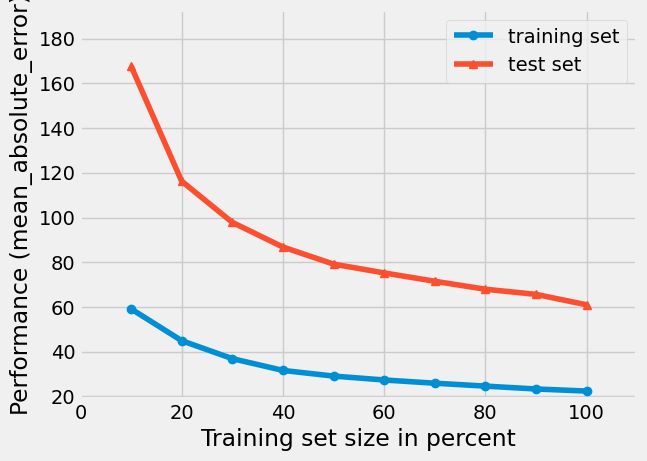

In [ ]:
from mlxtend.plotting import plot_learning_curves

# Initiate RF model with 200 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)

# plotting the learning curve
plot_learning_curves(X_train=train_features,
                     y_train=train_labels,
                     X_test=test_features,
                     y_test=test_labels,
                     clf=rf,
                     scoring='mean_absolute_error',
                     print_model=False)
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_learning_curves

# Initiate SVR model with a linear kernel
svr = SVR(kernel='linear')

# Perform 10-fold cross-validation
scores = cross_val_score(svr, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')
print("SVR 10-fold CV Mean Absolute Error:", round(-np.mean(scores), 2), "$/ton")

# plotting the learning curve
plot_learning_curves(X_train=train_features,
                     y_train=train_labels,
                     X_test=test_features,
                     y_test=test_labels,
                     clf=svr,
                     scoring='neg_mean_absolute_error',
                     print_model=False,
                     cv=10)
plt.show()

# Print training and testing accuracy
print('Support Vector Regressor Training accuracy {:.4f}'.format(svr.score(train_features,train_labels)))
print('Support Vector Regressor Testing accuracy {:.4f}'.format(svr.score(test_features,test_labels)))




In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initiate RF model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
scores = cross_val_score(rf, train_features, train_labels, cv = 10)
print("Random Forest Regressor: %0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

# Train the model on training data
rf.fit(train_features, train_labels)

# Print training and testing accuracy
print('Random Forest Regressor Training accuracy {:.4f}'.format(rf.score(train_features,train_labels)))
print('Random Forest Regressor Testing accuracy {:.4f}'.format(rf.score(test_features,test_labels)))


Random Forest Regressor: 0.99 accuracy with a standard deviation of 0.0034
Random Forest Regressor Training accuracy 0.9987
Random Forest Regressor Testing accuracy 0.9874


[0.98553565 0.99663323 0.99593182 0.99652867 0.99688226 0.98417242
 0.99620124 0.99155702 0.99586881 0.98790361]


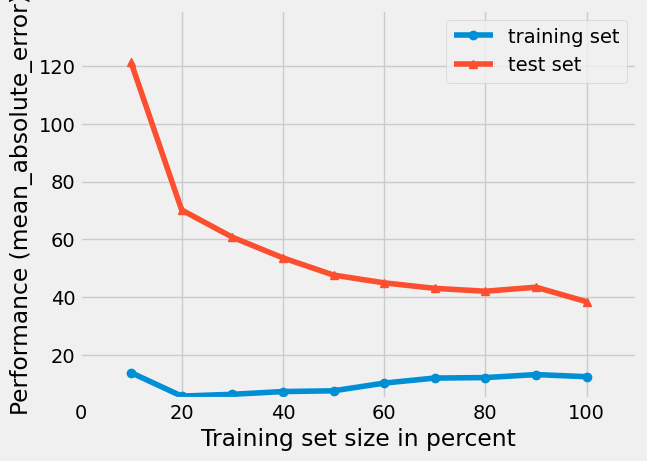

LGBM: 0.99 accuracy with a standard deviation of 0.0048
LGBM Training accuracy 0.9991
LGBM Testing accuracy 0.9910


In [ ]:
# Initiate LGMB model
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_learning_curves

clf = lgbm.LGBMClassifier(objective='binary',random_state=42)  # or 'mutliclass'
reg = lgbm.LGBMRegressor(n_estimators = 200, learning_rate = 0.1, saved_feature_importance_type = 1, random_state = 42)  # default - 'regression'
scores = cross_val_score(reg, train_features, train_labels, cv = 10)
print(scores)

# plotting the learning curve
plot_learning_curves(X_train=train_features,
                     y_train=train_labels,
                     X_test=test_features,
                     y_test=test_labels,
                     clf=reg,
                     scoring='mean_absolute_error',
                     print_model=False)
# plt.ylim(top=0.1, bottom=-0.025)
plt.show()

reg.fit(train_features, train_labels);
print("LGBM: %0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))
print('LGBM Training accuracy {:.4f}'.format(reg.score(train_features,train_labels)))
print('LGBM Testing accuracy {:.4f}'.format(reg.score(test_features,test_labels)))

In [ ]:
# Use the forest's predict method on the test data
print(test_features)
test_features = test_features[test_features != 0]
predictions = rf.predict(test_features)
predictions_lgbm = reg.predict(test_features)

# Calculate the absolute errors
print(test_labels[test_labels < 0])
print(predictions[test_labels < 0])
# test_labels = test_labels[test_labels != 0]
errors_RF = abs(predictions - test_labels)
print(errors_RF[test_labels < 0])

# Calculate the absolute errors
print(test_labels[test_labels < 0])
print(predictions[test_labels < 0])
# test_labels = test_labels[test_labels != 0]
errors_LGBM = abs(predictions_lgbm - test_labels)
print(errors_LGBM[test_labels < 0])

# Print out the mean absolute error (mae)
print('RF Mean Absolute Error:', round(np.mean(errors_RF), 2), '$/ton')
print('LGBM Mean Absolute Error:', round(np.mean(errors_LGBM), 2), '$/ton')

[]
[]
[]
[]
[]
[]
RF Mean Absolute Error: 60.99 $/ton
LGBM Mean Absolute Error: 38.43 $/ton


In [ ]:
# Calculate mean absolute percentage error (MAPE)
# import sys
# np.set_printoptions(threshold=sys.maxsize)
errors_RF = errors_RF[test_labels != 0]
test_labels = test_labels[test_labels != 0]
## test_labels = abs(test_labels)
mape = 100 * (errors_RF / test_labels)
# print(errors)
# print(test_labels)
# Calculate and display accuracy
accuracy_RF = 100 - np.mean(mape)
print('RF Accuracy:', round(accuracy_RF, 2), '%.')

# Calculate mean absolute percentage error (MAPE)
# import sys
# np.set_printoptions(threshold=sys.maxsize)
errors_LGBM = errors_LGBM[test_labels != 0]
test_labels = test_labels[test_labels != 0]
## test_labels = abs(test_labels)
mape = 100 * (errors_LGBM / test_labels)
# print(errors)
# print(test_labels)
# Calculate and display accuracy
accuracy_LGBM = 100 - np.mean(mape)
print('LGBM Accuracy:', round(accuracy_LGBM, 2), '%.')

RF Accuracy: 96.07 %.
LGBM Accuracy: 97.64 %.


In [ ]:
# Get numerical feature importances
importances_RF = list(rf.feature_importances_)
importances_LGBM  = list(reg.booster_.feature_importance(importance_type='gain')/ sum(reg.booster_.feature_importance(importance_type='gain')))
# importances_LGBM  = list(reg.feature_importances_/ sum(reg.feature_importances_))

# List of tuples with variable and importance
feature_importances_RF = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_RF)]
feature_importances_LGBM = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_LGBM)]


# Sort the feature importances by most important first
feature_importances_RF = sorted(feature_importances_RF, key = lambda x: x[1], reverse = True)
feature_importances_LGBM = sorted(feature_importances_LGBM, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} RF Importance: {}'.format(*pair)) for pair in feature_importances_RF];
print('\n')
[print('Variable: {:20} LGBM Importance: {}'.format(*pair)) for pair in feature_importances_LGBM];

Variable: seaweed_map          RF Importance: 0.58
Variable: linecost             RF Importance: 0.36
Variable: capex                RF Importance: 0.04
Variable: harvcost             RF Importance: 0.01
Variable: Run #                RF Importance: 0.0
Variable: labor                RF Importance: 0.0
Variable: transportcost        RF Importance: 0.0
Variable: transportems         RF Importance: 0.0
Variable: maintenanceboatems   RF Importance: 0.0
Variable: insur                RF Importance: 0.0
Variable: license              RF Importance: 0.0
Variable: opex                 RF Importance: 0.0
Variable: productval           RF Importance: 0.0
Variable: avoidedems_product   RF Importance: 0.0
Variable: convertcost          RF Importance: 0.0
Variable: convertems           RF Importance: 0.0
Variable: depth_mult           RF Importance: 0.0
Variable: wave_mult            RF Importance: 0.0


Variable: seaweed_map          LGBM Importance: 0.58
Variable: linecost             LGBM Impor